
 # Ganesh Chaturthi Special Python Coding !!🙏 Ganapati Bappa Morya🙏!!¶       

100%|████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 6873.09it/s]


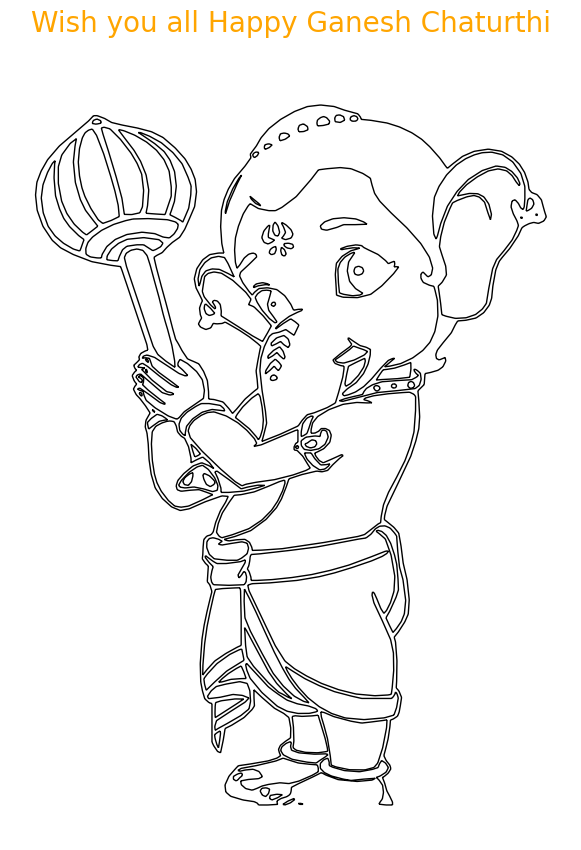

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from svgpathtools import svg2paths2
from tqdm import tqdm

class SketchFromSVG:
    def __init__(self, path, scale=1.0, x_offset=0, y_offset=0):
        self.path = path
        self.scale = scale
        self.x_offset = x_offset
        self.y_offset = y_offset

    def hex_to_rgb(self, hex_color):
        """Convert hex color to RGB."""
        hex_color = hex_color.lstrip('#')
        lv = len(hex_color)
        return tuple(int(hex_color[i:i + lv // 3], 16) / 255.0 for i in range(0, lv, lv // 3))

    def svg_to_path_patch(self):
        """Convert the SVG file paths into matplotlib PathPatch objects."""
        paths, attributes, svg_attributes = svg2paths2(self.path)

        height = float(svg_attributes['height'].replace('px', ''))
        width = float(svg_attributes['width'].replace('px', ''))

        patches = []
        for i, attribute in tqdm(enumerate(attributes), total=len(attributes)):
            svg_path = paths[i]  # Get the parsed path object from svgpathtools
            fill_color = attribute.get('fill', '#ff9999')  # Use pink as default fill color or set any color

            vertices = []
            codes = []

            # Iterate over the segments in the path and extract vertices and codes
            for segment in svg_path:
                start = (segment.start.real, segment.start.imag)
                vertices.append((start[0] * self.scale - self.x_offset, (height - start[1]) * self.scale - self.y_offset))  # Flip y-axis
                codes.append(Path.MOVETO)
                
                if hasattr(segment, 'end'):
                    end = (segment.end.real, segment.end.imag)
                    vertices.append((end[0] * self.scale - self.x_offset, (height - end[1]) * self.scale - self.y_offset))  # Flip y-axis
                    codes.append(Path.LINETO)

            # Create the matplotlib Path and PathPatch
            path = Path(vertices, codes)
            patch = PathPatch(path, facecolor=self.hex_to_rgb(fill_color), lw=1, edgecolor='black')  # Add black outline
            patches.append(patch)
        
        return patches

    def draw(self):
        """Draw the SVG using matplotlib."""
        fig, ax = plt.subplots(figsize=(8, 10))

        # Get the PathPatches from the SVG file
        patches = self.svg_to_path_patch()

        for patch in patches:
            ax.add_patch(patch)

        # Adjust plot limits and aspect ratio
        ax.set_aspect('equal')
        ax.autoscale()

        # Add a title text on top
        plt.text(0.5, 1.05, 'Wish you all Happy Ganesh Chaturthi', horizontalalignment='center', fontsize=20, color='orange', transform=ax.transAxes)

        # Hide the axis
        ax.axis('off')

        # Show the plot
        plt.show()

# Load and draw the SVG with Matplotlib
# Adjust the scale and offsets as necessary to center the drawing
svg_sketch = SketchFromSVG("C:\\Users\\ChinmayeeNayak\\OneDrive\\Desktop\\Ganesh chaturthi python pnb\\ganesh.svg", scale=1.5, x_offset=-200, y_offset=0)
svg_sketch.draw()